# Appendix: Assignment 3 Programming

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import sympy as sym
import math

x = sym.symbols('x')
t = sym.symbols('t')

## Question 1

In [5]:
# Root of val = x - e^(-x) and here, e^(-x) = f_exp
xval = [0.3, 0.4, 0.5, 0.6]
f_exp = [0.740818, 0.670320, 0.606531, 0.548812]

val = [xval[i] - f_exp[i] for i in range(len(xval))]
NevilleTable = sym.Matrix(len(xval), len(xval), lambda i, j: 0)

for i in range(len(val)):
    NevilleTable[i,0] = val[i]

for i in range(len(xval)):
    for j in range(i):
        k = j+1
        NevilleTable[i,k] = ((x - xval[i-k])*NevilleTable[i,k-1] - (x - xval[i])*NevilleTable[i-1,k-1])/(xval[i] - xval[i-k])

print(sym.simplify(NevilleTable))


Matrix([[-0.440818000000000, 0, 0, 0], [-0.270320000000000, 1.70498*x - 0.952312, 0, 0], [-0.106531000000000, 1.63789*x - 0.925476, -0.335449999999998*x**2 + 1.939795*x - 0.992566, 0], [0.0511880000000000, 1.57719*x - 0.895126, -0.303499999999995*x**2 + 1.91104*x - 0.986175999999999, 0.106500000000005*x**3 - 0.463250000000006*x**2 + 1.98985*x - 0.998956000000001]])


In [7]:
xbound = [0,0]
k = 0
while True:
    if (NevilleTable[k,0].subs(x,xval[k]))*(NevilleTable[k+1,0].subs(x,xval[k+1])) < 0:
        xbound[0] = xval[k]
        xbound[1] = xval[k+1]
        k = k+1
        break
    k = k+1

for j in range(1,len(xval)):
    xvalues = sym.nroots(NevilleTable[k,j])
    xvalues = [root for root in xvalues if root.is_real]
    xvalues = [float(root) for root in xvalues]
    for i in range(len(xvalues)):
        if xvalues[i]<=xbound[1] and xvalues[i]>=xbound[0]:
            xvalue = xvalues[i]
    print(f"For i = {j}  --> ", xvalue)

    if j < len(xval) - 1:
        if (NevilleTable[k-1,j+1].subs(x,xbound[0]))*(NevilleTable[k,j+1].subs(x,xvalue)) < 0:
            xbound[1] = xvalue
        elif (NevilleTable[k,j+1].subs(x,xvalue))*(NevilleTable[k,j+1].subs(x,xbound[1])) < 0:
            xbound[0] = xvalue


For i = 1  -->  0.567544810707651
For i = 2  -->  0.5671201348931916
For i = 3  -->  0.567145198663419


In [9]:
def f(x):
    return x - sym.exp(-x)
def fp(x):
    return sym.diff(f(x),x)

p = [0]
tol = 1e-6
iter = 0
while True:
    p_new = p[iter] - (f(x).subs(x,p[iter])/fp(x).subs(x,p[iter]))
    p_new = sym.N(p_new)
    p.append(p_new)
    if abs((p[iter+1]-p[iter])/p[iter+1])<=tol:
        iter = iter+1
        break
    iter = iter+1

x_true = p[iter]
f_true = f(x).subs(x,p[iter])

print("True Value of x: ", x_true)
print("True Value of f(x): ", f_true)


True Value of x:  0.567143290409781
True Value of f(x):  -4.44089209850063e-15


In [11]:
x_pred = xvalue
f_pred = NevilleTable[len(xval)-1,len(xval)-1].subs(x,xvalue)

print("Predicted Value of x: ", x_pred)
print("Predicted Value of f(x): ", f_pred)

rel_err_x = abs(x_pred - x_true)/abs(x_true)
print("\nRelative Error: ", rel_err_x)


Predicted Value of x:  0.567145198663419
Predicted Value of f(x):  -2.07510197176505e-15

Relative Error:  3.36467638805107e-6


## Question 2

In [13]:
tval = [0,1,2,3,4,5,6,7,8,9,10,11,12]
xval = [0.7,1.22,2.11,3.07,3.25,2.8,2.11,1.3,0.7,0.45,0.88,2,3.25]
yval = [2.25,1.77,1.61,1.75,2.3,2.76,2.91,2.76,2.25,1.37,0.56,0.08,0.25]

NevilleTablex = sym.Matrix(len(xval), len(xval), lambda i, j: 0)
NevilleTabley = sym.Matrix(len(yval), len(yval), lambda i, j: 0)

for i in range(len(tval)):
    NevilleTablex[i,0] = xval[i]
    NevilleTabley[i,0] = yval[i]

for i in range(len(tval)):
    for j in range(i):
        k = j+1
        NevilleTablex[i,k] = ((t - tval[i-k])*NevilleTablex[i,k-1] - (t - tval[i])*NevilleTablex[i-1,k-1])/(tval[i] - tval[i-k])
        NevilleTabley[i,k] = ((t - tval[i-k])*NevilleTabley[i,k-1] - (t - tval[i])*NevilleTabley[i-1,k-1])/(tval[i] - tval[i-k])

f = NevilleTablex[len(tval)-1,len(tval)-1]
g = NevilleTabley[len(tval)-1,len(tval)-1]

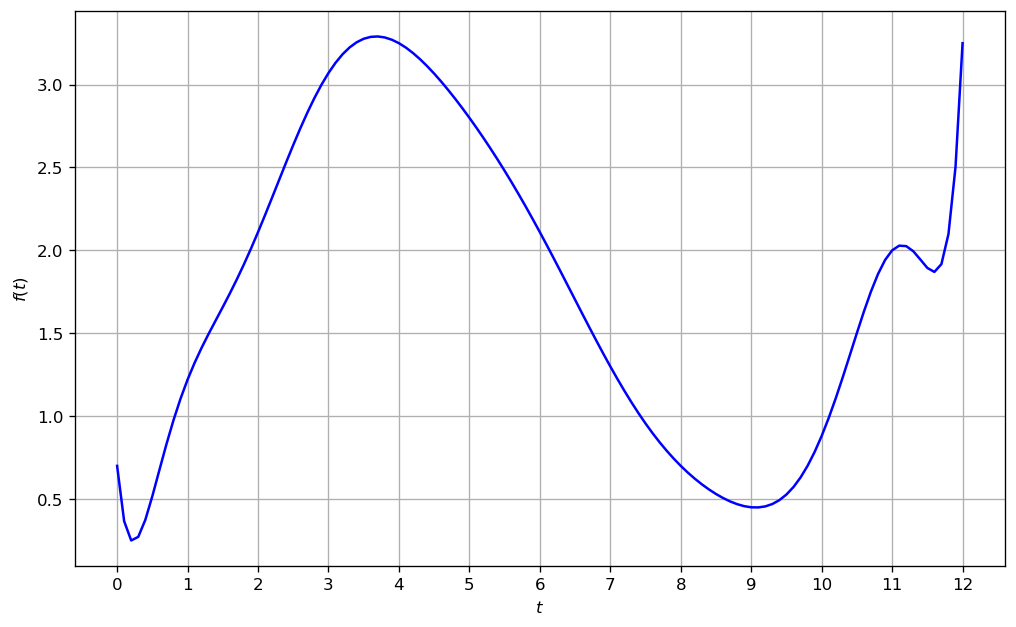

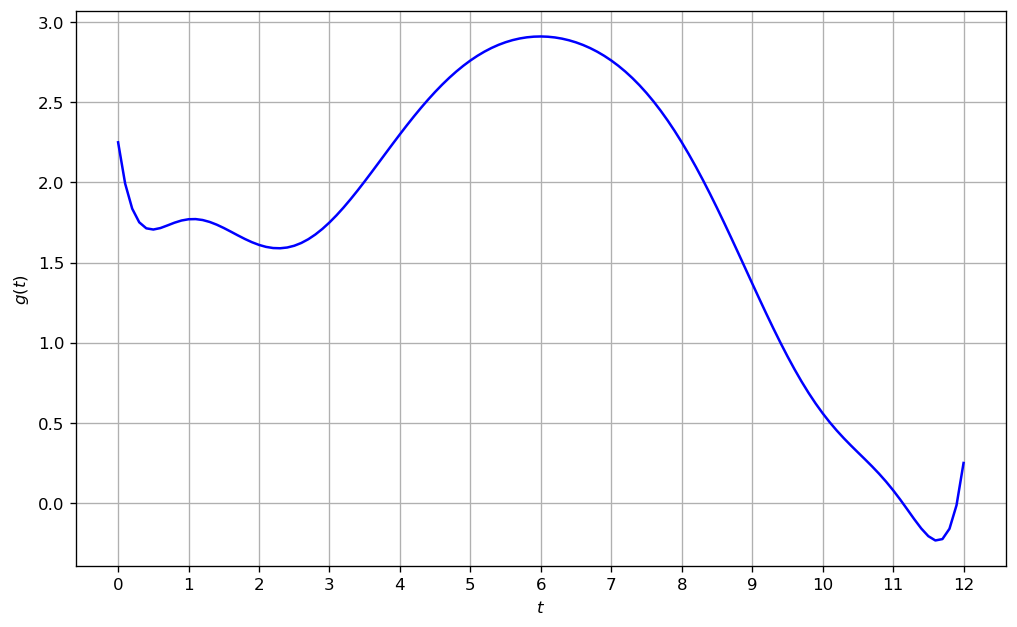

In [21]:
values = np.arange(0, 12 + 0.1, 0.1)
fvalues = [f.subs(t,i) for i in values]
gvalues = [g.subs(t,i) for i in values]

plt.figure(figsize=(10, 6), dpi=120)
plt.plot(values, fvalues,'b')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.grid(True, which="both", ls="-")
plt.xlabel(r"$t$")
plt.ylabel(r"$f(t)$")
plt.savefig('ft.png')
plt.show()

plt.figure(figsize=(10, 6), dpi=120)
plt.plot(values, gvalues,'b')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.grid(True, which="both", ls="-")
plt.xlabel(r"$t$")
plt.ylabel(r"$g(t)$")
plt.savefig('gt.png')
plt.show()

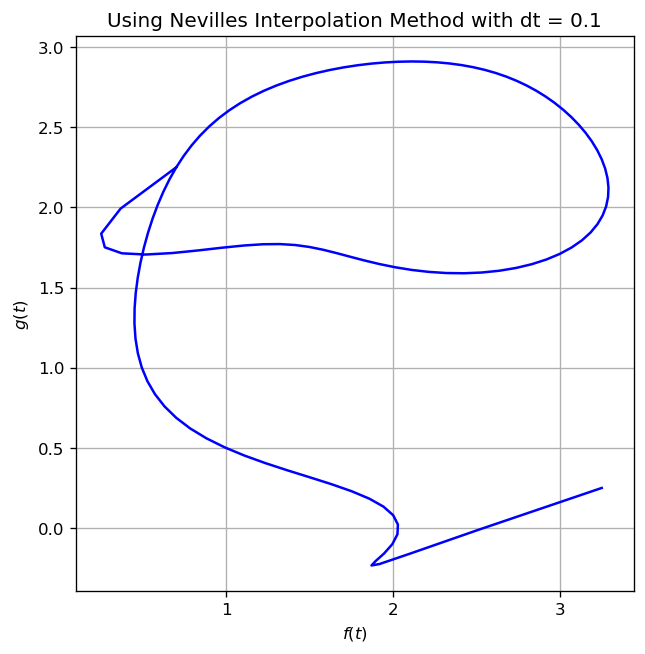

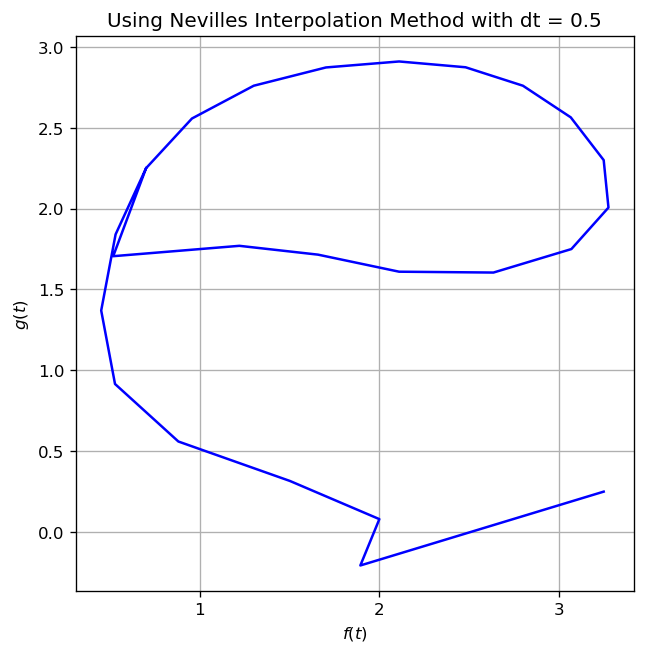

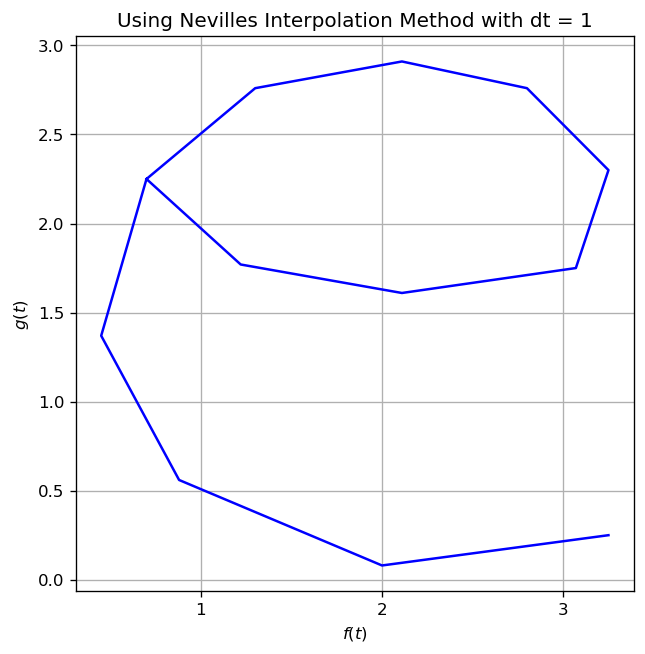

In [41]:
dtval = [0.1, 0.5, 1]
for dt in dtval:
    a = 0
    b = 12
    fval = []
    gval = []
    while a<=b:
        fval.append(f.subs(t,a))
        gval.append(g.subs(t,a))
        a = a + dt
    plt.figure(figsize=(6, 6), dpi=120)
    plt.plot(fval,gval,'b')
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
    plt.grid(True, which="both", ls="-")
    plt.xlabel(r"$f(t)$")
    plt.ylabel(r"$g(t)$")
    plt.title(f"Using Nevilles Interpolation Method with dt = {dt}")
    plt.savefig(f'fgNeville{dt}.png')
    plt.show()

## Question 3

In [43]:
tval = [0,1,2,3,4,5,6,7,8,9,10,11,12]
xval = [0.7,1.22,2.11,3.07,3.25,2.8,2.11,1.3,0.7,0.45,0.88,2,3.25]
yval = [2.25,1.77,1.61,1.75,2.3,2.76,2.91,2.76,2.25,1.37,0.56,0.08,0.25]

Matx = np.zeros((4*(len(tval)-1),4*(len(tval)-1)))
bx = []
Maty = np.zeros((4*(len(tval)-1),4*(len(tval)-1)))
by = []

row = 0
col = 0

for i in range(len(tval)-1):
    Matx[row,4*col] = 1
    bx.append(xval[i])
    
    Maty[row,4*col] = 1
    by.append(yval[i])
    
    row = row + 1
    col = col + 1

col = 0
for i in range(len(tval)-1):
    Matx[row,4*col] = 1
    Matx[row,4*col+1] = tval[i+1] - tval[i]
    Matx[row,4*col+2] = (tval[i+1] - tval[i])**2
    Matx[row,4*col+3] = (tval[i+1] - tval[i])**3
    bx.append(xval[i+1])
    
    Maty[row,4*col] = 1
    Maty[row,4*col+1] = tval[i+1] - tval[i]
    Maty[row,4*col+2] = (tval[i+1] - tval[i])**2
    Maty[row,4*col+3] = (tval[i+1] - tval[i])**3
    by.append(yval[i+1])
    
    row = row + 1
    col = col + 1

col = 0
for i in range(len(tval)-2):
    Matx[row,4*col+1] = 1
    Matx[row,4*col+2] = 2*(tval[i+1] - tval[i])
    Matx[row,4*col+3] = 3*(tval[i+1] - tval[i])**2
    Matx[row,4*(col+1)+1] = -1
    bx.append(0)

    Maty[row,4*col+1] = 1
    Maty[row,4*col+2] = 2*(tval[i+1] - tval[i])
    Maty[row,4*col+3] = 3*(tval[i+1] - tval[i])**2
    Maty[row,4*(col+1)+1] = -1
    by.append(0)
    
    row = row + 1
    col = col + 1

col = 0
for i in range(len(tval)-2):
    Matx[row,4*col+2] = 2
    Matx[row,4*col+3] = 6*(tval[i+1] - tval[i])
    Matx[row,4*(col+1)+2] = -2
    bx.append(0)

    Maty[row,4*col+2] = 2
    Maty[row,4*col+3] = 6*(tval[i+1] - tval[i])
    Maty[row,4*(col+1)+2] = -2
    by.append(0)
    
    row = row + 1
    col = col + 1

# Natural Spline
Matx[row,2] = 2
bx.append(0)
Matx[row+1,-2] = 2
Matx[row+1,-1] = 6
bx.append(0)

Maty[row,2] = 2
by.append(0)
Maty[row+1,-2] = 2
Maty[row+1,-1] = 6
by.append(0)

# Find solution to linear system of equation
coeffx = np.linalg.solve(Matx, bx)
coeffy = np.linalg.solve(Maty, by)
print(coeffx)
print(coeffy)

fvalues = sym.Matrix(1, len(tval)-1, lambda i, j: 0)
gvalues = sym.Matrix(1, len(tval)-1, lambda i, j: 0)
vals = 0
for i in range(len(fvalues)):
    fvalues[i] = coeffx[vals] + coeffx[vals+1]*(t - tval[i]) + coeffx[vals+2]*(t - tval[i])**2 + coeffx[vals+3]*(t - tval[i])**3
    gvalues[i] = coeffy[vals] + coeffy[vals+1]*(t - tval[i]) + coeffy[vals+2]*(t - tval[i])**2 + coeffy[vals+3]*(t - tval[i])**3
    vals = vals + 4


[ 7.00000000e-01  4.37914579e-01  0.00000000e+00  8.20854211e-02
  1.22000000e+00  6.84170842e-01  2.46256263e-01 -4.04271053e-02
  2.11000000e+00  1.05540205e+00  1.24974947e-01 -2.20377000e-01
  3.07000000e+00  6.44220947e-01 -5.36156052e-01  7.19351051e-02
  3.25000000e+00 -2.12285842e-01 -3.20350737e-01  8.26365797e-02
  2.80000000e+00 -6.05077578e-01 -7.24409981e-02 -1.24814240e-02
  2.11000000e+00 -7.87403846e-01 -1.09885270e-01  8.72891163e-02
  1.30000000e+00 -7.45307038e-01  1.51982079e-01 -6.67504128e-03
  7.00000000e-01 -4.61368004e-01  1.31956955e-01  7.94110488e-02
  4.50000000e-01  4.07790526e-02  3.70190101e-01  1.90308461e-02
  8.80000000e-01  8.38251794e-01  4.27282640e-01 -1.45534433e-01
  2.00000000e+00  1.25621377e+00 -9.32065991e-03  3.10688664e-03]
[ 2.25000000e+00 -5.52213337e-01 -1.38777878e-17  7.22133367e-02
  1.77000000e+00 -3.35573327e-01  2.16640010e-01 -4.10666837e-02
  1.61000000e+00 -2.54933572e-02  9.34399590e-02  7.20533982e-02
  1.75000000e+00  3.7754

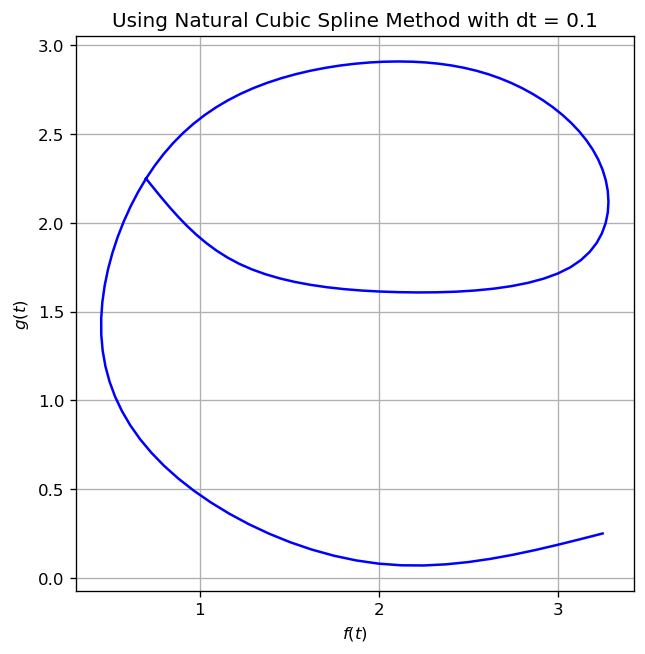

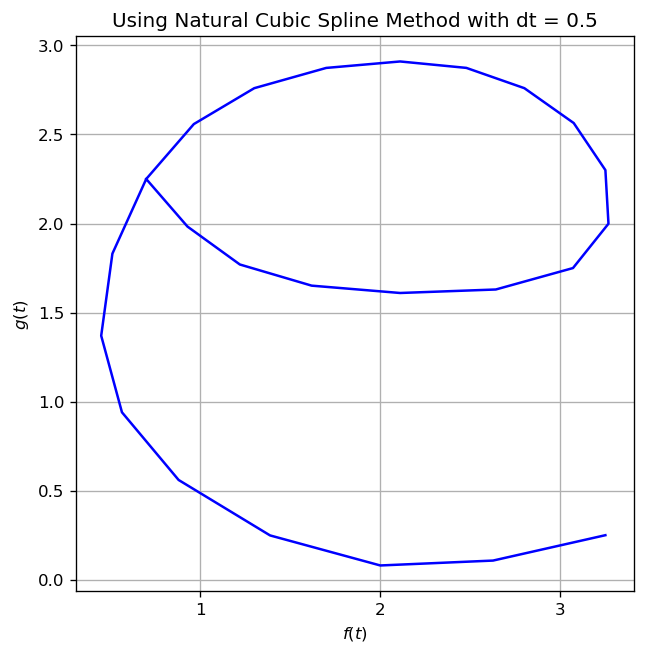

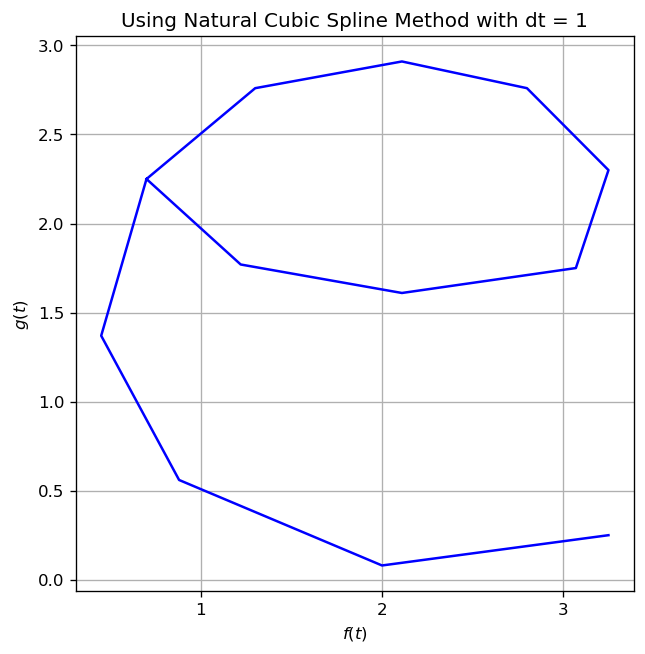

In [45]:
dtval = [0.1, 0.5, 1]

def find_index(tvalue, t_values):
    k = 0
    for i in range(len(t_values)-1):
        if tvalue>t_values[i+1]:
            k = k+1
        else:
            break
    return k

for dt in dtval:
    a = 0
    b = 12
    t_values = np.arange(a,b + dt,dt)
    func_count = 0
    fval = []
    gval = []
    for i in range(len(t_values)):
        tvalue = t_values[i]
        func_count = find_index(tvalue, tval)
        if tvalue > b:
            break
        fval.append(fvalues[func_count].subs(t,tvalue))
        gval.append(gvalues[func_count].subs(t,tvalue))
    plt.figure(figsize=(6, 6), dpi=120)
    plt.plot(fval,gval,'b')
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
    plt.grid(True, which="both", ls="-")
    plt.xlabel(r"$f(t)$")
    plt.ylabel(r"$g(t)$")
    plt.title(f"Using Natural Cubic Spline Method with dt = {dt}")
    plt.savefig(f'fgCubic{dt}.png')
    plt.show()

## Question 4

Value of a:  0.006086559661783669
Value of b:  16.86397450267915


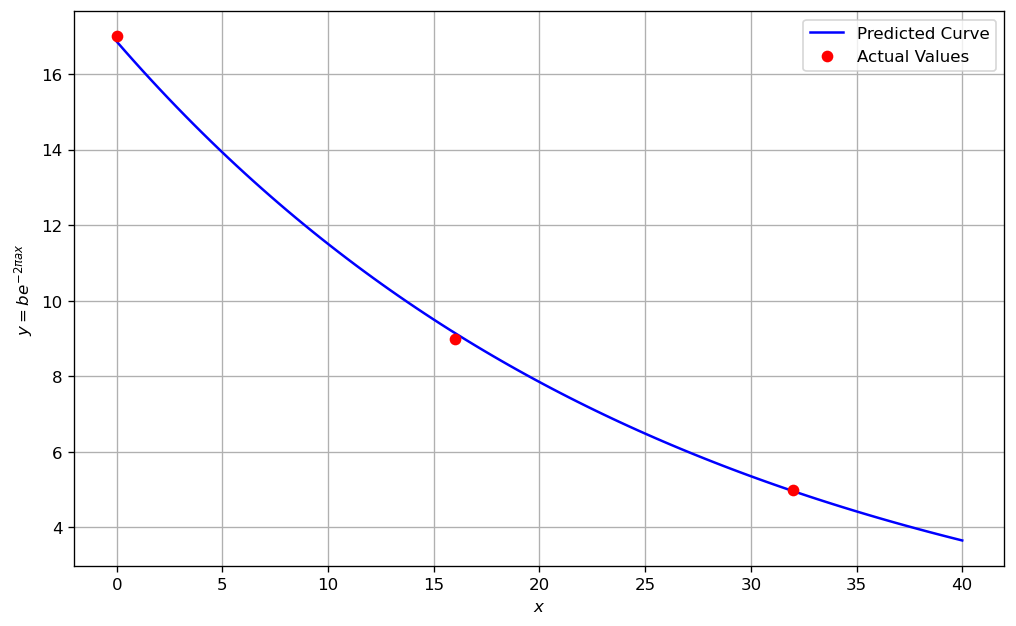

In [39]:
xval = [0,16,32]
yval = [17,9,5]

Mat = np.zeros((2,2))
Mat[0,0] = np.sum([2*np.pi*xi**2 for xi in xval])
Mat[0,1] = -np.sum([xi for xi in xval])
Mat[1,0] = np.sum([2*np.pi*xi for xi in xval])
Mat[1,1] = -len(xval)
bmat = []
bmat.append(-np.sum([xval[i]*np.log(yval[i]) for i in range(len(xval))]))
bmat.append(-np.sum([np.log(yi) for yi in yval]))

coeff = np.linalg.solve(Mat, bmat)
aval = coeff[0]
bval = np.exp(coeff[1])

print("Value of a: ", aval)
print("Value of b: ", bval)

func = bval*sym.exp(-2*sym.pi*aval*x)

x_vals = np.linspace(0, 40, 100)
y_vals = [func.subs(x, val).evalf() for val in x_vals]

plt.figure(figsize=(10, 6), dpi=120)
plt.plot(x_vals, y_vals, 'b', label = f"Predicted Curve")
plt.plot(xval, yval, 'ro', label = f"Actual Values")
plt.legend()
plt.grid(True, which="both", ls="-")
plt.xlabel(r"$x$")
plt.ylabel(r"$y = be^{-2\pi ax}$")
plt.savefig('LinearLeastSquare.png')
plt.show()
